----

### <span style="color:#0b486b">SIT744 Practical Machine Learning for Data Science</span>


---


# <span style="color:#0b486b">Assignment Two: Deep Neural Networks, Representation Learning, and Text Analytics</span>
### Due: <span style="color:red">24:00pm 26 September 2019</span>  (Tuesday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **40%** to your final mark. Read the assignment instruction carefully.

This notebook has been prepared for your to complete Assignment 2. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, word embedding and text analytics. Some sections have been partially completed to help you get
started. **The total marks for this notebook are 80 marks, which will be re-scaled to 40 marks in the grade.**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

## <span style="color:#0b486b">Instruction</span>

This assignment contains **two** parts 

* Part 1: Deep Feedforward Neural Network **[45 points]**
* Part 2: Word2Vec, text analytics and application **[35 points]**

**Hint**: This assignment was essentially designed based on the lectures and practical lab sessions covered from Week 5 to 9. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to CloudDeakin. **By the due date, you are required to submit the following files to the corresponding Assignment in CloudDeakin**:

1.	<span style="color:red">**[YourID]_assignment2_solution.ipynp**</span>:  **this is your Python notebook solution source file**.
1.	<span style="color:red">**[YourID]_assingment2_output.html**</span>: **this is the output of your Python notebook solution *exported* in html format**.
1.	<span style="color:red">Any extra files needed to complete your assignment</span> (e.g., images used in your answers).

For example, if your student ID is: 123456, you will then need to submit the following files:
* 123456_assignment2_solution.ipynp
* 123456_assignment2_output.html
* any extra files or subfolder you might have (this can be named according to your preference).

<span style="color:red">Please proceed to the content below to complete your assignment!</span>

## <span style="color:#0b486b">Part 1: Deep Feedforward Neural Network </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 45 points]**<span></div>

The first part of this assignment is for you to demonstrate the knowledge in deep learning that you have acquired from the lectures and practical lab materials. Most of the contents in this assignment are drawn from the practical materials in week 5, 6 and 7 for deep neural networks. Going through these materials before attempting this assignment is highly recommended.

*Run the following cell to create necessary subfolders for this assignment. You must **not** modify these codes and **must** run it first*.

In [1]:
# Create necessary subfolders to store immediate files for this assignment.

import os
if not os.path.exists("./models/dnn0"):
    os.makedirs("models/dnn0")

The first part of this assignment is to apply DNN to recognize letters from A-Z. You have played with MNIST dataset in your pracs and this should have given a good sense of how to apply DNN on images for recognition task. 

In this assignment, you are going to work with the **notMNIST** dataset for *letter recognition task*. The dataset contains 10 classes of letters A-J taken from different fonts. You will see some examples at the visualization task in the next part. A short blog about the data can be found [here](http://yaroslavvb.blogspot.com.au/2011/09/notmnist-dataset.html).

Here we only consider a small subset which can be found at [this link](http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat). This file has been already downloaded and stored in subfolder `datasets` of this assignment folder. The file is in *Matlab* format, thus our first task is to:

####  <span style="color:red">**Question 1.1**</span>. Load the data into *`numpy array`* format of two variables:
* *`x`*: storing features with dimension `[num_samples, width, height]` (`num_samples`: number of samples, `width`: image width, `height`: image height), and
* *`y`*: storing labels with dimension `num_samples`. 
<div style="text-align: right"><span style="color:red">**[3 points]**</span></div>

Enter the missing codes in the following cell to complete this question.

In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio

data = sio.matlab.loadmat("datasets/notMNIST_small.mat")
width,height,num_samples=data['images'].shape

x = np.zeros(shape=(num_samples,width,height))
y = np.asarray(data['labels']) 
x = np.asarray(data['images'])
x = np.rollaxis(x,axis=2)

print("x=",x.shape)
print("y=",y.shape)

x= (18724, 28, 28)
y= (18724,)


####  <span style="color:red">**Question 1.2**</span>. Print out the total number of data points, and the *unique* labels in this dataset.
<div style="text-align: right"><span style="color:red">**[3 points]**</span></div> 

In [3]:
print("Number of Data points = ", num_samples)

y1 = np.unique(y)
print("number of unique data points= ", len(y1))
print("Unique data points= ", y1)

Number of Data points =  18724
number of unique data points=  10
Unique data points=  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


####  <span style="color:red">**Question 1.3**</span>. Display 100  images in the form of `10x10` matrix, each row showing 10 *random* images of a label. You might decide to use the function `display_images` provided at the beginning of this assignment, or you can write your own codes.
<div style="text-align: right"><span style="color:red">**[4 points]**</span></div> 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display_images(images, shape):
    fig = plt.figure(figsize=shape)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(np.prod(shape)):
        p = fig.add_subplot(shape[0], shape[1], i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)                

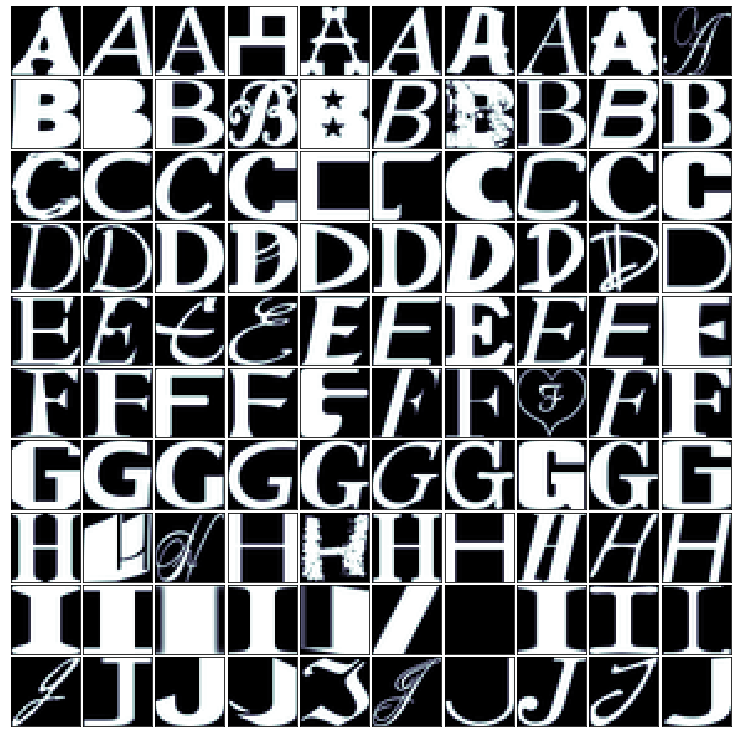

In [5]:
Label_unique = np.unique(y)
Images = []
for a in Label_unique:    
    Index = np.where(y == a)[0]
    Index = Index[np.random.permutation(len(Index))[:10]]    
    for i in Index:
        Images += [x[i]]
display_images(Images, shape=(10,10))

####  <span style="color:red">**Question 1.4**</span>. Use the *deep feedforward neural network* as the classifier to perform images classification task in a *single split training and testing*.

The total marks for this question is <span style="color:red">**[35 points]**</span>, with the following detailed breakdown sub-questions:

<span style="color:red">**(a)**</span> **Write your code to reshape the variable `x` storing features from `[num_samples, width, height]` dimension to `[num_samples, num_features]` with `num_features = width x height`. ** (*Hint*: you might want to use the `reshape()' function)
<div style="text-align: right"> <span style="color:red">**[3 points]**</span> </div>

In [6]:
num_samples, width, height = x.shape
num_features = width * height
x = x.reshape(num_samples,num_features)

In training the DNN, scaling data is important. The pixel intensities of images are in the range of [0, 255], which makes the neural network difficult to learn.

**Rescale the input data into the range of [0, 1]**
<div style="text-align: right"> 
<span style="color:red">**[2 points]**</span> </div>

In [7]:
from sklearn.preprocessing import MinMaxScaler
Scale = MinMaxScaler()
x = Scale.fit_transform(x)

<span style="color:red">**(b)**</span> **Split the data into two subsets: 70% for training and 30% for testing. Note that you must use [*Stratified-Shuffle-Split*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to make sure training and testing are balanced and randomly shuffled before learning the model.**
<div style="text-align: right"> <span style="color:red">**[5 points]**</span> </div>

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

Stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=18)
for train_index, test_index in Stratified_shuffle_split.split(x,y):
    Train_x, Test_x = x[train_index], x[test_index]
    Train_y, Test_y = y[train_index], y[test_index]
    
    print("Training set:", train_index, "Testing set:", test_index)

Training set: [16644 10949  9527 ... 14992 12530 13627] Testing set: [10290 10021  9746 ...  1655 18219 13944]


<span style="color:red">**(c)**</span> **Construct a deep feedforward neural network with the following architecture:**

* An input layer followed by *two* hidden layers, each with *500* hidden units, and an *output* layer;
* *ReLU* activations for neurons in each hidden layer;
* Training with gradient descent optimizer with learning rate **0.0011**, batch size 128 and 50 epochs.

(*Hint*: *this question heavily relies on the knowledge you've learned from lab session in week 5 and 6. You are encouraged to revise these materials for this question*)

<div style="text-align: right"> <span style="color:red">**[20 points]**</span> </div>

In [9]:
import tensorflow as tf

tf.reset_default_graph()

num_inputs = num_features
num_hidden1 = 500
num_hidden2 = 500       
num_outputs = len(np.unique(y))

inputs = tf.placeholder(tf.float32,[None,num_features],name='inputs')
labels = tf.placeholder(tf.int32,shape=[None],name='labels')

C:\Users\vikkp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikkp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikkp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikkp\AppData\Roaming\Python\Python37\site-

In [10]:
def neuron_layer(x, num_neurons, name, activation=None):
    with tf.name_scope(name):
        inputs = int(x.get_shape()[1])
        Std_dev = 2 / np.sqrt(inputs)
        Init= tf.truncated_normal([inputs, num_neurons], stddev=Std_dev)
        W = tf.Variable(Init, name="Weight")
        b = tf.Variable(tf.zeros([num_neurons]), name="Biasness")
        z = tf.matmul(x, W) + b
    if activation == "sigmoid":
        return tf.nn.sidmoid(z)
    elif activation == "relu":
        return tf.nn.relu(z)
    else:
        return z

In [11]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(inputs,num_hidden1,"hidden1",activation="relu")
    hidden2 = neuron_layer(inputs,num_hidden2,"hidden2",activation="relu")
    logits = tf.layers.dense(hidden2, num_outputs, name="outputs")
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("evaluation"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels,logits=logits, name='xentropy')
    loss = tf.reduce_mean(xentropy, name="loss")
    correct = tf.nn.in_top_k(logits, labels, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("train"):
    Learning_rate = 0.0011
    optimizer = tf.train.GradientDescentOptimizer(Learning_rate)
    training_op = optimizer.minimize(loss)
    grads = optimizer.compute_gradients(loss)
    
    for var in tf.trainable_variables():
        tf.summary.histogram(var.op.name + "/values", var)
        
    for grad, var in grads:
        if grad is not None:
            tf.summary.histogram(var.op.name + "/gradients", grad)


accuracy_summary = tf.summary.scalar('accuracy', accuracy)
accuracy_summary



Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<tf.Tensor 'accuracy:0' shape=() dtype=string>

In [12]:

tf.summary.histogram('hidden1/activations', hidden1)
tf.summary.histogram('hidden2/activations', hidden2)
merged = tf.summary.merge_all()

init = tf.global_variables_initializer()
saver = tf.train.Saver()

train_writer = tf.summary.FileWriter("models/dnn0/train", tf.get_default_graph())
test_writer = tf.summary.FileWriter("models/dnn0/test", tf.get_default_graph())

num_epochs = 50
batch_size = 128

<span style="color:red">**(d)**</span> **You are now required write code to train the DNN.** Write codes in the following cell. <span style="color:red">**[5 points]**</span> </div>

In [13]:
with tf.Session() as sess:
    init.run()
    print("Epoch\tTrain accuracy\tTest accuracy")
    for epoch in range(num_epochs):
        for idx_start in range(0, Train_x.shape[0], batch_size):
            idx_end = idx_start+batch_size
            x_batch, y_batch = Train_x[idx_start:idx_end],Train_y[idx_start:idx_end]
            sess.run(training_op, feed_dict={inputs: x_batch, labels: y_batch})
            
        summary_train, acc_train = sess.run([merged, accuracy],feed_dict={inputs: x_batch, labels: y_batch})
        summary_test, acc_test = sess.run([accuracy_summary, accuracy],feed_dict={inputs: Test_x, labels: Test_y})
        
        train_writer.add_summary(summary_train, epoch)
        test_writer.add_summary(summary_test, epoch)
        
        print("{}\t{}\t{}".format(epoch, acc_train, acc_test))

    save_path = saver.save(sess, "models/dnn0.ckpt")

Epoch	Train accuracy	Test accuracy
0	0.4399999976158142	0.33873265981674194
1	0.6600000262260437	0.5526877641677856
2	0.7400000095367432	0.6623353362083435
3	0.800000011920929	0.7264150977134705
4	0.8399999737739563	0.762192964553833
5	0.8600000143051147	0.7831968665122986
6	0.8600000143051147	0.7972587943077087
7	0.8600000143051147	0.8072267770767212
8	0.8600000143051147	0.8143467307090759
9	0.8600000143051147	0.8189747333526611
10	0.8600000143051147	0.8237807154655457
11	0.8600000143051147	0.827696681022644
12	0.8600000143051147	0.832858681678772
13	0.8600000143051147	0.8362406492233276
14	0.8600000143051147	0.8381986618041992
15	0.8600000143051147	0.8410466313362122
16	0.8600000143051147	0.8430046439170837
17	0.8600000143051147	0.845318615436554
18	0.8600000143051147	0.8470985889434814
19	0.8600000143051147	0.848344624042511
20	0.8600000143051147	0.8497685790061951
21	0.8600000143051147	0.8503025770187378
22	0.8600000143051147	0.8510146141052246
23	0.8600000143051147	0.8531506061553

---

## <span style="color:#0b486b">Part 2: Word2Vec, Text Analytics and Application</span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 35 points]**<span></div>


In this part, you are going to use Word2Vec for document classification on [20 Newsgroups](http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.html) dataset. This dataset is a collection of messages collected from 20 different netnews newsgroups. One thousand messages from each of the twenty newsgroups were chosen at random and partitioned by newsgroup name. The list of newsgroups from which the messages were chosen is as follows:

`
alt.atheism
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc
soc.religion.christian
comp.sys.ibm.pc.hardware
comp.graphics
comp.os.ms-windows.misc
comp.sys.mac.hardware
comp.windows.x
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.space
sci.med
misc.forsale
`

### <span style="color:#0b486b"> Download the dataset and data pre-processing</span>

####  <span style="color:red">**Question 2.1**</span> Your first task is to run the following code to download the dataset.

<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

In [14]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_all = fetch_20newsgroups(subset='all', remove=('headers'))

####  <span style="color:red">**Question 2.2**</span>. Print out the total number of documents, and the *unique* labels in this dataset.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

In [15]:
import numpy as np 
import pandas as pd
l1 = len(newsgroups_all.filenames)
x= newsgroups_all.filenames
y= np.unique(newsgroups_all.target)
print("Total number of documents =", len(x))
print("Total number of unique lables are = ", len(y))
print("Unique labels in the data set are =", y)

Total number of documents = 18846
Total number of unique lables are =  20
Unique labels in the data set are = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


####  <span style="color:red">**Question 2.3**</span>. Convert the documents into a list of tokens using the function `gensim.utils.tokenize`.
<div style="text-align: right"><span style="color:red">**[3 point]**</span></div>


In [16]:
import gensim

token_corpus=[]
for idx in newsgroups_all.data:
    tokens = gensim.utils.tokenize(idx)
    token_corpus.append(list(tokens))

### <span style="color:#0b486b"> Train the model </span>


####  <span style="color:red">**Question 2.4**</span>. Train gensim's word2vec model.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div>

* Train gensim's word2vec model with the settings of:
    * The dimensionality of the feature vectors: `size=100`,
    * The maximum distance between the current and predicted word within a sentence: `window=5`,
    * Minimum frequence (ignore all words with total frequency lower than this): `min_count=5`,


In [17]:
from gensim.models import Word2Vec

size = 100
window = 5
min_count=5

model = Word2Vec(token_corpus, size=size, window=window, min_count=min_count)

* Save the trained model to a file named "20_newsgroups.gensim"

In [18]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
model.save("20_newsgroups.gensim")


C:\Users\vikkp\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


####  <span style="color:red">**Question 2.5**</span>. Print out the vocabulary size (number of words in vocabulary).
<div style="text-align: right"><span style="color:red">**[2 points]**</span></div> 

In [19]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
words = list(model.wv.vocab.keys())
print(f"The number of words: {len(words)}")

The number of words: 42461


####  <span style="color:red">**Question 2.6**</span>. Using the embedding results, calculate and print out the ten most similar words to word 'law' and their corresponding similarity scores.<div style="text-align: right"><span style="color:red">**[3 points]**</span></div> 

In [20]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
len(model['law'])
model.wv.most_similar('law')

C:\Users\vikkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[('laws', 0.7402864694595337),
 ('court', 0.7124512195587158),
 ('government', 0.7022823095321655),
 ('enforcement', 0.6793253421783447),
 ('marriage', 0.6713044047355652),
 ('property', 0.6644319891929626),
 ('legal', 0.663907527923584),
 ('constitution', 0.6631689071655273),
 ('Constitution', 0.6629014015197754),
 ('authorities', 0.659641683101654)]

### <span style="color:#0b486b"> Evaluate the embeddings using classification </span>

Now we investigate the quality of embedded vectors via document classification task. We have learned the embeddings for words, but not for documents yet, thus we need to find a way to extract the document embeddings from word embeddings. We are going to try two approaches:
* Taking the **sum** of vectors of all words in the document; or
* Taking the **average** of vectors of all words in the document.

####  <span style="color:red">**Question 2.7**</span>. Extract document vectors using `sum`.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

* Remove all ***empty*** documents. A document is empty if it does not contain any word in the vocabulary;
* Extract document vectors and save to variable `x`;
* Save the corresponding labels to variable `y`.

In [21]:
def Empty_docs(corpus, labels):
    corpus_filter = []
    labels_filter = []
    for doc, label in zip(corpus, labels):
        if doc.strip():
            corpus_filter.append(doc)
            labels_filter.append(label)
    return corpus_filter, labels_filter

x, y = Empty_docs(newsgroups_all.data, newsgroups_all.target)
l2 = len(y)

def extract_doc2vec(doc, w2v):
    vecs = [w2v[word] for word in doc if word in w2v]
    if len(vecs) > 0:
        vecs = np.asarray(vecs).sum(axis=0)
    return vecs

tokenized_corpus = []
for doc in x:
    tokenize = gensim.utils.tokenize(doc)
    tokenized_corpus.append(list(tokenize))

####  <span style="color:red">**Question 2.8**</span>. Print out the number of documents retained after removing empty documents.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

In [22]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
def document_vectorized(corpus, model):
    w2v = model.wv
    features = [extract_doc2vec(doc = tokenized_corpus, w2v = w2v) for tokenized_corpus in corpus]
    return features

x = []
x = document_vectorized(tokenized_corpus,model)

print("Total Number of non-empty documents are:", len(x))
print("Number of empty documents removed are :",l1-l2)

Total Number of non-empty documents are: 18812
Number of empty documents removed are : 34


#### <span style="color:red">**Question 2.9**</span>. Split the data into two subsets: 70% for training and 30% for testing. Note that you must use [*Stratified-Shuffle-Split*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to make sure training and testing are balanced and randomly shuffled before learning the model.
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [23]:
#Splitting and storing the data into train and test set
from sklearn.model_selection import StratifiedShuffleSplit
Train_x= []
Test_x = []
Train_y = []
Test_y = []

Stratified_shuffle_split= StratifiedShuffleSplit(n_splits=1, train_size=0.7)

for idx_train, idx_test in Stratified_shuffle_split.split(x,y):
    idx1 = idx_train
    idx2 = idx_test


for i in range(len(idx1)):  #Storing training data
    temp = idx1[i]
    Train_x.append(x[temp])
    Train_y.append(y[temp])
    
    
for i in range(len(idx2)): #Storing testing data
    temp = idx2[i]
    Test_x.append(x[temp])
    Test_y.append(y[temp])

#### <span style="color:red">**Question 2.10**</span>. **Use [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as the classifier, train and test the model using the training and test datasets from the previous step. Report the training accuracy and testing accuracy.**
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [24]:
Train_x = pd.DataFrame(Train_x) 
Train_y = pd.DataFrame(Train_y)
Test_x = pd.DataFrame(Test_x)
Test_y = pd.DataFrame(Test_y)


na = Train_x.isna().any(axis=1) #Detecting NA values in train
Null = na[na==True]

Train_x = Train_x.dropna()
Train_y = Train_y.drop(Null.index,axis = 0) #removing NA values

na = Test_x.isna().any(axis=1) #Detecting NA values in test
Null = na[na==True]

Test_y = Test_y.drop(Null.index,axis = 0)  #removing NA values
Test_x = Test_x.dropna()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [26]:
Scale = MinMaxScaler()   #scale to which we have to use.

Train_x = Scale.fit_transform(Train_x) 
Test_x = Scale.fit_transform(Test_x)

Regression_model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(Train_x,Train_y)

Predict_y = Regression_model.predict(Train_x)
print("Training Accuracy: {}".format(accuracy_score(Predict_y,Train_y)))

Predict_y = Regression_model.predict(Test_x)
print("Testing Accuracy: {}".format(accuracy_score(Predict_y,Test_y)))

C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.20683630839346753
Testing Accuracy: 0.06360737065910702


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


####  <span style="color:red">**Question 2.11**</span>. Now modify the `extract_doc2vec` function above to  extract document vectors using `average`, instead of `sum`, and repeat the experiment: split the data, train and test using Logistic Regression.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

In [27]:
x, y = Empty_docs(newsgroups_all.data, newsgroups_all.target)
l2 = len(y)

token_corpus = []
for doc in x:
    tokens = gensim.utils.tokenize(doc)
    token_corpus.append(list(tokens))

In [28]:
def extract_doc2vec(doc, w2v):
    vecs = [w2v[word] for word in doc if word in w2v]
    if len(vecs) > 0:
        vecs = np.asarray(vecs).mean(axis=0)
    return vecs

In [29]:
print("Total Number of non-empty documents are:", len(x))
print("Number of empty documents removed are :",l1-l2)
x = []
x = document_vectorized(token_corpus,model)

Total Number of non-empty documents are: 18812
Number of empty documents removed are : 34


In [30]:
Train_x= []
Test_x = []
Train_y = []
Test_y = []

Stratified_shuffle_split= StratifiedShuffleSplit(n_splits=1, train_size=0.7)

for idx_train, idx_test in Stratified_shuffle_split.split(x,y):
    idx1 = idx_train
    idx2 = idx_test


for i in range(len(idx1)):
    temp = idx1[i]
    Train_x.append(x[temp])
    Train_y.append(y[temp])
    
    
for i in range(len(idx2)):
    temp = idx2[i]
    Test_x.append(x[temp])
    Test_y.append(y[temp])
    
print("Training set:", idx_train, "Testing set:", idx_test) 

Training set: [ 2094  7901  1826 ...  2962 11461 12550] Testing set: [ 8604 10007  6859 ...  3170  9442  7409]


In [31]:
Train_x = pd.DataFrame(Train_x) 
Train_y = pd.DataFrame(Train_y)
Test_x = pd.DataFrame(Test_x)
Test_y = pd.DataFrame(Test_y)


na = Train_x.isna().any(axis=1) #Detecting NA values in train
Null = na[na==True]

Train_x = Train_x.dropna()
Train_y = Train_y.drop(Null.index,axis = 0) #removing NA values

na = Test_x.isna().any(axis=1) #Detecting NA values in test
Null = na[na==True]

Test_y = Test_y.drop(Null.index,axis = 0)  #removing NA values
Test_x = Test_x.dropna()

In [32]:
Scale = MinMaxScaler()

Train_x = Scale.fit_transform(Train_x)
Test_x = Scale.fit_transform(Test_x)

Regression_model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(Train_x,Train_y)

Predict_y = Regression_model.predict(Train_x)
print("Training Accuracy: {}".format(accuracy_score(Predict_y,Train_y)))

Predict_y = Regression_model.predict(Test_x)
print("Testing Accuracy: {}".format(accuracy_score(Predict_y,Test_y)))

C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.5574965821054231
Testing Accuracy: 0.27006911217437535


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


######  <span style="color:red">**Question 2.12**</span>. Which representation (sum or average doc vector) gives the best performance? Write your observations and any lessons learned.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 


###### The accuracy achieved from the two impementations vectorising the words are as follows:

1) Sum of vectors:
- Training accuracy= 20.68%
- Testing accuracy= 6.36%

2) Average of vectors:
- Training accuracy= 55.74%
- Testing accuracy= 27%

Analysing the accuracy score of both sum and average of vectors, we can say that average of vectors is a better choice for bulding a model.
On further research, I have found that the selcetion of words can be done more efficiently by either using principal component analysis or by weight of words in the document. 
 


--- 
<div style="text-align: center"> <span style="color:black">**END OF ASSIGNMENT**</span> </div>